In [7]:
import models
from models import model, create_cd_cluster
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";loss="value";budget="used_fidelity"

data_5=get_dataset(dataset_name="fig5_24_at25_bad_intsteps")
data_5=data_5.loc[data_5["prior"]=="bad"].drop(columns=["prior","benchmark","regret","norm_regret","rel_rank"])
print(data_5)

      algorithm  used_fidelity     value  seed       bench_prior
0            PB            1.0  0.521580     0     LC-167190_bad
1            RS            1.0  0.224055     0     LC-167190_bad
2            HB            1.0  0.216327     0     LC-167190_bad
3            PB            1.0  0.521580     1     LC-167190_bad
4            RS            1.0  0.234032     1     LC-167190_bad
...         ...            ...       ...   ...               ...
86245        RS           24.0  0.311192    48  PD1-ImageNet_bad
86246        HB           24.0  0.238401    48  PD1-ImageNet_bad
86247        PB           24.0  0.272386    49  PD1-ImageNet_bad
86248        RS           24.0  0.228643    49  PD1-ImageNet_bad
86249        HB           24.0  0.248037    49  PD1-ImageNet_bad

[43200 rows x 5 columns]


In [8]:
m_root= model(formula=f"{loss}~{algorithm}",data=data_5)
m_seed_random= model(formula=f"{loss}~{algorithm}+(1|{seed})",data=data_5)
m_seed_fixed= model(formula=f"{loss}~{algorithm}+{seed}",data=data_5)
m_bench_random = model(formula=f"{loss}~{algorithm}+(1|{benchmark})",data=data_5)
m_bench_fixed = model(formula=f"{loss}~{algorithm}+{benchmark}",data=data_5)

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 



In [9]:
models.glrt(m_root,m_seed_fixed,names=["M_root","M_seed_fixed"])
models.glrt(m_root,m_seed_random,names=["M_root","M_seed_random"])
models.glrt(m_root,m_bench_random,names=["M_root","M_bench_random"])
models.glrt(m_root,m_bench_fixed,names=["M_root","M_bench_fixed"])
models.glrt(m_bench_random,m_bench_fixed,names=["M_bench_random","M_bench_fixed"])


M_root (-144296.4) == M_seed_fixed (-144296.36)
Chi-Square: 0.06460504920687526, P-Value: 0.7993601834069115
M_root (-144296.4) == M_seed_random (-144296.4)
Chi-Square: 0.0, P-Value: nan
M_root (-144296.4) << M_bench_random (-135047.08)
Chi-Square: 18498.641380013665, P-Value: nan
M_root (-144296.4) << M_bench_fixed (-134995.66)
Chi-Square: 18601.46888155432, P-Value: 0.0
M_bench_random (-135047.08) << M_bench_fixed (-134995.66)
Chi-Square: 102.82750154065434, P-Value: 0.0


In [10]:
result=m_bench_fixed.post_hoc(marginal_vars="algorithm")
print(result[1].drop(columns=["2.5_ci","97.5_ci","SE","DF","T-stat"]))

P-values adjusted by tukey method for family of 3 estimates
  Contrast  Estimate  P-val  Sig
1  PB - RS     1.049  0.000  ***
2  PB - HB     0.949  0.000  ***
3  RS - HB    -0.100  0.272     


boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates


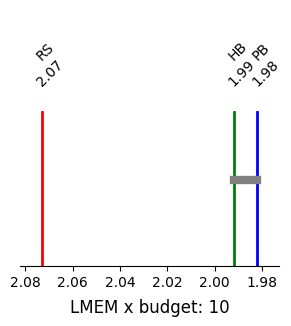

<Axes: >

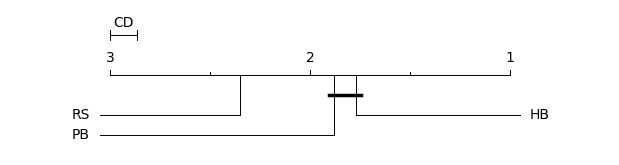

In [11]:
data_10=data_5.loc[data_5["used_fidelity"]==10]
m_10 = model(formula=f"{loss}~{algorithm}+{benchmark}",data=data_10)
m10_res=m_10.post_hoc(marginal_vars="algorithm")
_=create_cd_cluster({"LMEM":{"budget: 10":m10_res}})
autorank_10=convert_to_autorank(data_10)
plot_stats(autorank(autorank_10))

In [13]:
m_full = model(formula=f"{loss}~{algorithm}:{budget}+{benchmark}",data=data_5,factor_list=["budget"])
mfull_res=m_full.post_hoc(marginal_vars="algorithm",grouping_vars="budget")
_=create_cd_cluster({"LMEM":{"budget: 10":mfull_res}})


KeyError: 'budget'